In [1]:
# 1️⃣ Importing essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting for Jupyter Notebook
%matplotlib inline


# These libraries are the foundation of the project.
# They allow me to work with data, numbers, and basic visualizations.


In [2]:
# 2️⃣ Load the stock data from CSV
data_path = "../data/raw/stock_data.csv"
df = pd.read_csv(data_path)

# Preview the first few rows to ensure data loaded correctly
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,10/3/2018,35.67,35.75,35.91,35.47,5.08M,-0.45%
1,10/2/2018,35.83,35.95,36.32,35.59,5.86M,-0.56%
2,10/1/2018,36.03,35.71,36.16,35.63,7.28M,0.90%
3,9/30/2018,35.71,35.14,35.71,35.14,3.61M,1.97%
4,9/27/2018,35.02,35.22,35.47,35.02,3.72M,-0.79%


In [3]:
# 3️⃣ Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Check dataframe info to confirm data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5000 non-null   datetime64[ns]
 1   Price     5000 non-null   float64       
 2   Open      5000 non-null   float64       
 3   High      5000 non-null   float64       
 4   Low       5000 non-null   float64       
 5   Vol.      4853 non-null   object        
 6   Change %  5000 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 273.6+ KB


In [4]:
# 4️⃣ Clean and convert 'Vol.' column (trading volume) to float
# The column contains strings like "5.08M", "1.2K" or numbers with commas.
def convert_vol(x):
    if pd.isna(x):
        return None
    x = str(x).replace(',', '').strip()
    if x.endswith('B'):
        return float(x[:-1]) * 1_000_000_000
    elif x.endswith('M'):
        return float(x[:-1]) * 1_000_000
    elif x.endswith('K'):
        return float(x[:-1]) * 1_000
    else:
        return float(x)

df['Vol.'] = df['Vol.'].apply(convert_vol)

In [5]:
# 5️⃣ Fill remaining missing values in 'Vol.'
# Since all rows are important, we avoid dropping them.
# We'll use forward fill (ffill) first, then backward fill (bfill) as a fallback.
df['Vol.'] = df['Vol.'].fillna(method='ffill').fillna(method='bfill')

# Confirm no missing values remain
print("Missing values after fill:", df['Vol.'].isnull().sum())

Missing values after fill: 0


C:\Users\Tix\AppData\Local\Temp\ipykernel_24544\1660492019.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Vol.'] = df['Vol.'].fillna(method='ffill').fillna(method='bfill')


In [6]:
# 6️⃣ Convert 'Change %' column to numeric float
df['Change %'] = df['Change %'].str.rstrip('%').astype(float)

# Preview dataframe
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2018-10-03,35.67,35.75,35.91,35.47,5080000.0,-0.45
1,2018-10-02,35.83,35.95,36.32,35.59,5860000.0,-0.56
2,2018-10-01,36.03,35.71,36.16,35.63,7280000.0,0.90
3,2018-09-30,35.71,35.14,35.71,35.14,3610000.0,1.97
4,2018-09-27,35.02,35.22,35.47,35.02,3720000.0,-0.79


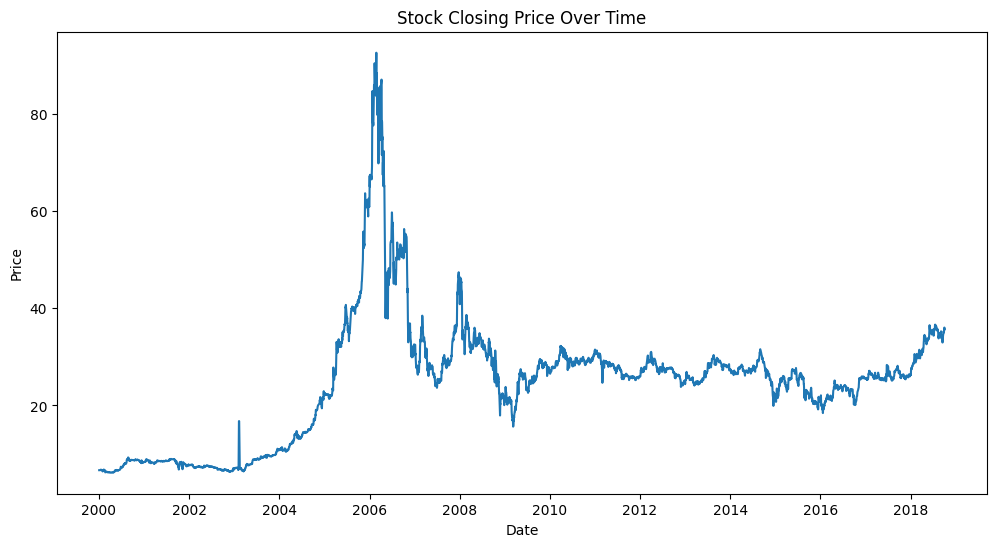

In [7]:
# 7️⃣ Exploratory visualization of closing price over time
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Price')
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [8]:
# 8️⃣ Final check for missing data
print("Missing values in the dataframe:")
print(df.isnull().sum())

Missing values in the dataframe:
Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [9]:
processed_path = "../data/processed/stock_data_clean.csv"
df.to_csv(processed_path, index=False)


# NEXT STEPS:
# 1. Feature engineering: create technical indicators, moving averages, etc.
# 2. Prepare features and target for ML model
# 3. Train Random Forest / other models
# 4. Add explainability analysis (SHAP, feature importance)
